In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [ ]:
def activation(x):
  """ x: Torch.tensor"""
  return 1/(1+torch.exp(x))

In [ ]:
torch.manual_seed(7)
features = torch.randn(1,5)
weights = torch.randn_like(features)
bias = torch.randn(1,1)

In [ ]:
%%time
activation((features*weights).sum()+ bias)

CPU times: user 1.94 ms, sys: 2.99 ms, total: 4.93 ms
Wall time: 72.7 ms


tensor([[0.8405]])

In [ ]:
%%time
activation(torch.sum(features*weights)+ bias)

CPU times: user 1.4 ms, sys: 69 µs, total: 1.47 ms
Wall time: 1.6 ms


tensor([[0.8405]])

In [ ]:
print("shape of features",features.shape)
print("shape of Weights",weights.shape)


shape of features torch.Size([1, 5])
shape of Weights torch.Size([1, 5])


In [ ]:
weights.resize_(5,1)
weights.reshape(5,1)

tensor([[-0.8948],
        [-0.3556],
        [ 1.2324],
        [ 0.1382],
        [-1.6822]])

In [ ]:
weights=weights.view(5,1)

In [ ]:
activation(torch.mm(features,weights) + bias)

tensor([[0.8405]])

In [ ]:
# Creating some random data

torch.manual_seed(7)
features = torch.randn((1,3))
n_input = features.shape[1]
hidden_layers = 2
n_output =1

W1 = torch.randn(n_input, hidden_layers)
W2 = torch.randn(hidden_layers, n_output)

B1 = torch.randn(1,hidden_layers)
B2 = torch.randn(1,n_output)





In [ ]:
W1.shape

torch.Size([3, 2])

In [ ]:
features.shape

torch.Size([1, 3])

In [ ]:
c= activation(torch.mm(features,W1) + B1)
activation(torch.mm(c,W2) + B2)

tensor([[0.5290]])

In [ ]:
# numpy to tensor

import numpy as np
a=np.random.rand(4,3)
a

array([[0.34028887, 0.41190019, 0.30409679],
       [0.89728611, 0.67877756, 0.34164003],
       [0.29589284, 0.60719073, 0.63150313],
       [0.61272556, 0.89292949, 0.85978285]])

In [ ]:
b=torch.from_numpy(a)

In [ ]:
b.numpy()

array([[0.34028887, 0.41190019, 0.30409679],
       [0.89728611, 0.67877756, 0.34164003],
       [0.29589284, 0.60719073, 0.63150313],
       [0.61272556, 0.89292949, 0.85978285]])

In [ ]:
b.mul_(2)

tensor([[0.6806, 0.8238, 0.6082],
        [1.7946, 1.3576, 0.6833],
        [0.5918, 1.2144, 1.2630],
        [1.2255, 1.7859, 1.7196]], dtype=torch.float64)

In [ ]:
a

array([[0.68057775, 0.82380038, 0.60819358],
       [1.79457223, 1.35755511, 0.68328006],
       [0.59178569, 1.21438147, 1.26300626],
       [1.22545112, 1.78585897, 1.71956571]])

In [ ]:
# MNIST data  using NN class in pytorch

from matplotlib import pyplot as plt
%matplotlib inline 
import torch
import helper

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

In [ ]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [ ]:
trainset= datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)

trainloader = torch.utils.data.DataLoader2(trainset,batch_size=64,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
dataiter = iter(trainloader)

In [ ]:
for images, labels in trainloader:
  print(type(images))
  print(images.shape , " Image shape")
  print(labels.shape, " label shape")
  break

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])  Image shape
torch.Size([64])  label shape


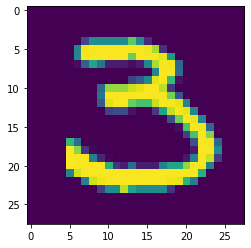

In [ ]:
plt.imshow(images[1].numpy().squeeze())

In [ ]:
def activation(x):
  return 1/(1+torch.exp(x))

In [ ]:
images.view(images.shape[0],-1).shape

torch.Size([64, 784])

In [ ]:
# building neural network
features = images.view(images.shape[0],-1)
hidden_layers =256
Weights1 = torch.randn(features.shape[1],hidden_layers)
Weights2 = torch.randn(hidden_layers,10)
Bias1 = torch.randn(1,hidden_layers)

Bias2 = torch.randn(1,10)

h = activation(torch.mm(features,Weights1) + Bias1)
final_layer=activation(torch.mm(h,Weights2) + Bias2)

final_layer.shape



torch.Size([64, 10])

In [ ]:
# softmax function

def softmax_func(x):
  return torch.exp(x)/torch.sum(torch.exp(final_layer),dim=1).view(-1,1)

In [ ]:
softmax_func(final_layer)[0],labels[0]

(tensor([0.0687, 0.0727, 0.0687, 0.1866, 0.0708, 0.0826, 0.1169, 0.1865, 0.0743,
         0.0722]), tensor(4))

In [ ]:
class Network(nn.Module):

  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x=  self.output(x)
    x = self.softmax(x)

    return x




In [ ]:
c =Network()
c.forward(features)

tensor([[0.0934, 0.1023, 0.1357, 0.1070, 0.0711, 0.0809, 0.0766, 0.1039, 0.0809,
         0.1482],
        [0.0922, 0.0977, 0.1288, 0.1129, 0.0710, 0.0833, 0.0748, 0.1111, 0.0882,
         0.1401],
        [0.0953, 0.0983, 0.1352, 0.1099, 0.0722, 0.0754, 0.0746, 0.1046, 0.0864,
         0.1481],
        [0.0986, 0.0986, 0.1336, 0.1075, 0.0747, 0.0857, 0.0683, 0.1110, 0.0760,
         0.1458],
        [0.0980, 0.1028, 0.1312, 0.1069, 0.0720, 0.0902, 0.0693, 0.1014, 0.0785,
         0.1497],
        [0.0923, 0.0989, 0.1305, 0.1044, 0.0686, 0.0895, 0.0788, 0.1109, 0.0800,
         0.1460],
        [0.0976, 0.1091, 0.1337, 0.1051, 0.0716, 0.0917, 0.0672, 0.1067, 0.0787,
         0.1385],
        [0.0923, 0.1026, 0.1334, 0.1092, 0.0782, 0.0863, 0.0750, 0.1060, 0.0810,
         0.1359],
        [0.0957, 0.1025, 0.1355, 0.1053, 0.0755, 0.0859, 0.0774, 0.1073, 0.0814,
         0.1335],
        [0.0955, 0.1074, 0.1313, 0.1121, 0.0718, 0.0905, 0.0685, 0.1078, 0.0758,
         0.1393],
        [0

In [ ]:
import torch.nn.functional as F
class Network(nn.Module):

  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)
    

  def forward(self,x):
    
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x))

    return x

In [ ]:
c =Network()
c.forward(features)[0],labels[0]

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
<ipython-input-33-ad75a84d45f7>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output(x))


(tensor([0.1285, 0.1262, 0.1279, 0.0560, 0.0806, 0.0516, 0.1933, 0.0569, 0.0662,
         0.1129], grad_fn=<SelectBackward0>), tensor(4))

In [ ]:
# using RELU and 2 hidden layers
import torch.nn.functional as F
class Network(nn.Module):

  def __init__(self):
    super().__init__()

    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    

  def forward(self,x):
    
    x = F.relu(self.hidden1(x))
    x = torch.sigmoid(self.hidden2(x))
    x = F.softmax(self.output(x))

    return x

In [ ]:
c =Network()
c.forward(features)[0],labels[0]

<ipython-input-35-bef217b11bd4>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output(x))


(tensor([0.1185, 0.0995, 0.0562, 0.1326, 0.0623, 0.1205, 0.1006, 0.1242, 0.1032,
         0.0823], grad_fn=<SelectBackward0>), tensor(4))

In [ ]:
c

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Building model sequentially and also making it train

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.Softmax())
print(model)
criterion = nn.CrossEntropyLoss()
images,labels = next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)
print(loss, "loss")

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=None)
)
tensor(2.3031, grad_fn=<NllLossBackward0>) loss


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
images.shape

torch.Size([64, 784])

In [ ]:
"# Building model sequentially and also making it train with logsoftmax

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
print(model)
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)
print(loss, "loss")

SyntaxError: ignored

In [ ]:
# Back propagation
x= torch.randn(2,2,requires_grad=True)
print("X",x)
y = x**2
z= y.mean()
print("Z", z)
print("before backward", x.grad)
z.backward()
print("before backward", x.grad)
print("1/n * gard(x)== weights :: (1/4) * (2x)", (x/2))

X tensor([[ 0.3111,  1.1811],
        [ 0.3362, -0.2598]], requires_grad=True)
Z tensor(0.4180, grad_fn=<MeanBackward0>)
before backward None
before backward tensor([[ 0.1555,  0.5905],
        [ 0.1681, -0.1299]])
1/n * gard(x)== weights :: (1/4) * (2x) tensor([[ 0.1555,  0.5905],
        [ 0.1681, -0.1299]], grad_fn=<DivBackward0>)


In [ ]:
# Back propagation
x= torch.randn(2,2,requires_grad=True)
print("X",x)
y = x**3
z= y.mean()
print("Z", z)
print("before backward", x.grad)
z.backward()
print("before backward", x.grad)
print("1/n * gard(x)== weights :: (1/4) * (3x ** 2)", ((3*x*x)/4))

X tensor([[-1.6708,  0.8021],
        [ 0.7091, -1.3337]], requires_grad=True)
Z tensor(-1.5409, grad_fn=<MeanBackward0>)
before backward None
before backward tensor([[2.0937, 0.4825],
        [0.3771, 1.3340]])
1/n * gard(x)== weights :: (1/4) * (3x ** 2) tensor([[2.0937, 0.4825],
        [0.3771, 1.3340]], grad_fn=<DivBackward0>)


In [ ]:
# adding the back prop to train
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
print(model)
criterion = nn.NLLLoss()
images,labels = next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)
print(loss, "loss")


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
tensor(2.3083, grad_fn=<NllLossBackward0>) loss


In [ ]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [ ]:
print("before back propogation", model[0].weight.grad)
loss.backward()
print("after back propogation", model[0].weight.grad)

before back propogation None
after back propogation tensor([[ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0030,  0.0030,  0.0030,  ...,  0.0030,  0.0030,  0.0030],
        ...,
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017]])


In [ ]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)>

In [ ]:
from torch.optim.optimizer import Optimizer
from torch import optim
optimizer = optim.SGD(model.parameters(),lr =0.1)
print("initial_weights",model[0].weight)
images,labels = next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)
loss.backward()
print("updated_grad", model[0].weight.grad)
optimizer.step()
print("updated_weights", model[0].weight)

initial_weights Parameter containing:
tensor([[ 0.0205,  0.0098, -0.0216,  ...,  0.0356, -0.0118,  0.0044],
        [-0.0239,  0.0230, -0.0244,  ...,  0.0302,  0.0072, -0.0288],
        [ 0.0269, -0.0191,  0.0130,  ...,  0.0225, -0.0107,  0.0125],
        ...,
        [ 0.0277, -0.0006, -0.0305,  ...,  0.0229, -0.0227, -0.0172],
        [ 0.0179, -0.0039, -0.0272,  ..., -0.0166, -0.0267, -0.0029],
        [ 0.0338, -0.0264,  0.0172,  ...,  0.0012,  0.0327, -0.0182]],
       requires_grad=True)
updated_grad tensor([[-8.1865e-04, -8.1865e-04, -8.1865e-04,  ..., -8.1865e-04,
         -8.1865e-04, -8.1865e-04],
        [-3.0632e-06, -3.0632e-06, -3.0632e-06,  ..., -3.0632e-06,
         -3.0632e-06, -3.0632e-06],
        [ 4.6425e-03,  4.6425e-03,  4.6425e-03,  ...,  4.6425e-03,
          4.6425e-03,  4.6425e-03],
        ...,
        [ 1.6787e-03,  1.6787e-03,  1.6787e-03,  ...,  1.6787e-03,
          1.6787e-03,  1.6787e-03],
        [ 9.6061e-04,  9.6061e-04,  9.6061e-04,  ...,  9.6061e-

In [ ]:
loss.item()

2.300704002380371

In [ ]:
# training a model

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax())

criterion =  nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.003)
epochs =5
for epoch in range(epochs):
  running_loss = 0
  
  for images,labels in trainloader :
      
      images = images.view(images.shape[0],-1)
      optimizer.zero_grad()
      logits = model(images)
      loss = criterion(logits, labels)
      loss.backward()
      optimizer.step()
      running_loss +=  loss.item()
   
  print(f"Training loss : {running_loss/len(trainloader)}")


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss : 1.8610224500139638
Training loss : 0.8312464715130548
Training loss : 0.5167652786985389
Training loss : 0.42687999954355804
Training loss : 0.3847237982348338


In [ ]:
# training a model with different data set
transform= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
trainset= datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)

trainloader = torch.utils.data.DataLoader2(trainset,batch_size=64,shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
# training a model

model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax())

criterion =  nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.2)
epochs =5
for epoch in range(epochs):
  running_loss = 0
  
  for images,labels in trainloader :
      
      images = images.view(images.shape[0],-1)
      optimizer.zero_grad()
      logits = model(images)
      loss = criterion(logits, labels)
      loss.backward()
      optimizer.step()
      running_loss +=  loss.item()
   
  print(f"Training loss : {running_loss/len(trainloader)}")


Training loss : 0.7257919872302745
Training loss : 0.43770784269899193
Training loss : 0.37804583677732106
Training loss : 0.3457698640363938
Training loss : 0.32540945785004954


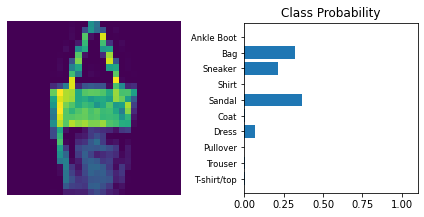

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[1]
img=img.view(img.shape[0],-1)
ps = torch.exp(model(img)) # coverting loglikelyhood to crossentropy

view_classify(img,ps,version='Fashion')



In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images=images.view(images.shape[0],-1)
print(images.shape)
ps = torch.exp(model(images)) # coverting loglikelyhood to crossentropy

top_prop,top_class=ps.topk(k=1,dim=1)
top_class.shape

torch.Size([64, 784])


torch.Size([64, 1])

In [ ]:
labels=labels.view(*top_class.shape)

In [ ]:
top_class == labels

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True

In [ ]:
equals = top_class == labels

In [ ]:
print("acccuracy",torch.mean(equals.type(torch.FloatTensor)))

acccuracy tensor(0.8594)


In [ ]:
# training a model with train and test loss

model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax())

criterion =  nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.2)
epochs =20
train_loss= []
test_loss = []
for epoch in range(epochs):
  running_loss = 0
  
  for images,labels in trainloader :
      
      images = images.view(images.shape[0],-1)
      optimizer.zero_grad()
      logits = model(images)
      loss = criterion(logits, labels)
      loss.backward()
      optimizer.step()
      running_loss +=  loss.item()
   
  print(f"Training loss : {running_loss/len(trainloader)}")
  
  running_test_loss = 0
  with torch.no_grad():
 
    for images,labels in testloader :
        images = images.view(images.shape[0],-1)
        
        test_logits = model(images)
        loss = criterion(test_logits, labels)
        # loss.backward()
        # optimizer.step()
        running_test_loss +=  loss.item()

    print(f"testing loss : {running_test_loss/len(testloader)}")
    
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images=images.view(images.shape[0],-1)
    print(images.shape)
    ps = torch.exp(model(images)) # coverting loglikelyhood to crossentropy

    top_prop,top_class=ps.topk(k=1,dim=1)
    top_class.shape    
    labels=labels.view(*top_class.shape)
    equals = top_class == labels
    print("testing acccuracy",torch.mean(equals.type(torch.FloatTensor)))
    train_loss.append(running_loss/len(trainloader))
    test_loss.append(running_test_loss/len(testloader))


Training loss : 0.7297314672168892
testing loss : 0.6514780952292643
torch.Size([64, 784])
testing acccuracy tensor(0.6875)
Training loss : 0.43244209952318846
testing loss : 0.413272104730272
torch.Size([64, 784])
testing acccuracy tensor(0.9375)
Training loss : 0.37809261673294914
testing loss : 0.44459481043800425
torch.Size([64, 784])
testing acccuracy tensor(0.8594)
Training loss : 0.34688731336167883
testing loss : 0.43972466848078806
torch.Size([64, 784])
testing acccuracy tensor(0.7656)
Training loss : 0.322333938221751
testing loss : 0.37112140389764386
torch.Size([64, 784])
testing acccuracy tensor(0.7812)
Training loss : 0.30455596544055036
testing loss : 0.4235863696997333
torch.Size([64, 784])
testing acccuracy tensor(0.8281)
Training loss : 0.2878269188995682
testing loss : 0.34615853058684404
torch.Size([64, 784])
testing acccuracy tensor(0.9219)
Training loss : 0.2782591070447649
testing loss : 0.35137115010790004
torch.Size([64, 784])
testing acccuracy tensor(0.9219)
T

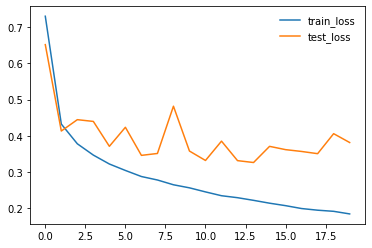

In [ ]:
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss,label='test_loss')
plt.legend(frameon=False)

In [ ]:
class dropout_nn(nn.Module):
  def __init__(self):
    super().__init__()
    self.h1 = nn.Linear(784,256)
    self.h2 = nn.Linear(256,128)
    self.h3 = nn.Linear(128,64)
    self.h4 = nn.Linear(64,32)
    self.h5 = nn.Linear(32,10)
    self.dropout = nn.Dropout(p=0.2)
    # self.func = nn.LogSoftmax()
    # self.relu = nn.ReLU()
  def forward(self,x):
    x= x.view(x.shape[0],-1)
    x= self.dropout(F.relu(self.h1(x)))
    x= self.dropout(F.relu(self.h2(x)))
    x= self.dropout(F.relu(self.h3(x)))
    x= self.dropout(F.relu(self.h4(x)))
    # x= self.dropout(F.relu(self.h5(x)))
    x = F.log_softmax(self.h5(x),dim=1)
    return x
model = dropout_nn()
epoch =20
optimiser = optim.SGD(model.parameters(),lr=0.1)   
criterion =  nn.NLLLoss()
train_loss= []
test_loss = []
for epoch in range(epochs):
  running_loss = 0
  for images,labels in trainloader:
    model.train()
    logits=model.forward(images)
    model.zero_grad()
    loss = criterion(logits,labels)
    loss.backward()
    optimiser.step()
    running_loss += loss.item()
  print(f"Training loss: {running_loss/len(trainloader)}")

  running_test_loss = 0
  with torch.no_grad():
    
    for images,labels in testloader :
        model.eval()
        images = images.view(images.shape[0],-1)
        
        test_logits = model(images)
        loss = criterion(test_logits, labels)
        # loss.backward()
        # optimizer.step()
        running_test_loss +=  loss.item()

    print(f"testing loss : {running_test_loss/len(testloader)}")
    
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images=images.view(images.shape[0],-1)
    #print(images.shape)'
    model.eval()
    ps = torch.exp(model(images)) # coverting loglikelyhood to crossentropy

    top_prop,top_class=ps.topk(k=1,dim=1)
    top_class.shape    
    labels=labels.view(*top_class.shape)
    equals = top_class == labels
    print("testing acccuracy",torch.mean(equals.type(torch.FloatTensor)))
    train_loss.append(running_loss/len(trainloader))
    test_loss.append(running_test_loss/len(testloader))

    



    


Training loss: 0.921391857585419
testing loss : 0.5199316375574489
testing acccuracy tensor(0.7656)
Training loss: 0.5443210232613692
testing loss : 0.45511233370015575
testing acccuracy tensor(0.8281)
Training loss: 0.4807303977419318
testing loss : 0.49721473208658257
testing acccuracy tensor(0.7500)
Training loss: 0.4432090587739243
testing loss : 0.4253353252532376
testing acccuracy tensor(0.7812)
Training loss: 0.4150051879984484
testing loss : 0.4232305035849286
testing acccuracy tensor(0.8281)
Training loss: 0.39946358091732076
testing loss : 0.49346980917605626
testing acccuracy tensor(0.7188)
Training loss: 0.38310689722964253
testing loss : 0.3637028877522535
testing acccuracy tensor(0.8594)
Training loss: 0.36912373926784436
testing loss : 0.39677481467177156
testing acccuracy tensor(0.8281)
Training loss: 0.3582483889388123
testing loss : 0.36778963229079153
testing acccuracy tensor(0.8750)
Training loss: 0.3474230138795462
testing loss : 0.36570324392835046
testing acccura

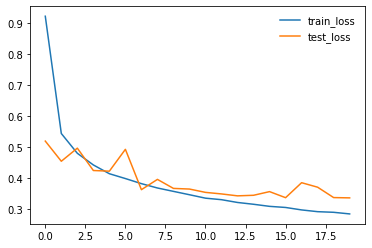

In [ ]:
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss,label='test_loss')
plt.legend(frameon=False)

In [ ]:
# using fc_model
#!pip install fc_model
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input layer
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
        
        '''
        super().__init__()
        # Input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)


def validation(model, testloader, criterion):
    accuracy = 0
    test_loss = 0
    for images, labels in testloader:

        images = images.resize_(images.size()[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ## Calculating the accuracy 
        # Model's output is log-softmax, take exponential to get the probabilities
        ps = torch.exp(output)
        # Class with highest probability is our predicted class, compare with true label
        equality = (labels.data == ps.max(1)[1])
        # Accuracy is number of correct predictions divided by all predictions, just take the mean
        accuracy += equality.type_as(torch.FloatTensor()).mean()

    return test_loss, accuracy


def train(model, trainloader, testloader, criterion, optimizer, epochs=5, print_every=40):
    
    steps = 0
    running_loss = 0
    for e in range(epochs):
        # Model in training mode, dropout is on
        model.train()
        for images, labels in trainloader:
            steps += 1
            
            # Flatten images into a 784 long vector
            images.resize_(images.size()[0], 784)
            
            optimizer.zero_grad()
            
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            if steps % print_every == 0:
                # Model in inference mode, dropout is off
                model.eval()
                
                # Turn off gradients for validation, will speed up inference
                with torch.no_grad():
                    test_loss, accuracy = validation(model, testloader, criterion)
                
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                      "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                
                running_loss = 0
                
                # Make sure dropout and grads are on for training
                model.train()





In [ ]:
model = Network(input_size=784, output_size=10, hidden_layers=[256,128,64,32])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr =0.1)

train(model,trainloader, testloader, criterion, optimizer, epochs=5, print_every=40)



Epoch: 1/5..  Training Loss: 21.530..  Test Loss: 2.311..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 12.844..  Test Loss: 2.315..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 4.960..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 9.041..  Test Loss: 2.311..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 2.311..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 2.500..  Test Loss: 2.315..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 71.537..  Test Loss: 2.318..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 19.840..  Test Loss: 2.313..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 2.750..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 2.313..  Test Loss: 2.309..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 4.193..  Test Loss: 2.307..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 2.433..  Test Loss: 2.308..  Test Accuracy: 0.100
Epoch: 1/5..  Training Loss: 8.365..  Test Loss:

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0267, -0.0074,  0.0083,  ...,  0.0588,  0.0598, -0.0065],
                      [ 0.0054,  0.0490,  0.0081,  ...,  0.0296,  0.0629,  0.0452],
                      [-0.0312, -0.0202, -0.0132,  ..., -0.0213,  0.0140,  0.0119],
                      ...,
                      [ 0.0113, -0.0171, -0.0061,  ...,  0.0247,  0.0367,  0.0379],
                      [-0.0176,  0.0032, -0.0056,  ..., -0.0293, -0.0203,  0.0019],
                      [ 0.0176, -0.0229,  0.0116,  ..., -0.0120, -0.0091, -0.0173]])),
             ('0.bias',
              tensor([ 8.9180e-03, -3.2655e-02, -5.2555e-03,  7.9455e-03, -2.0074e-02,
                      -5.4201e-02, -2.1492e-02, -1.5535e-02,  6.1771e-03, -2.1870e-02,
                       2.1911e-02,  2.9486e-02,  1.8268e-03, -2.1690e-02, -2.7084e-02,
                       1.2460e-02, -2.2234e-02, -4.4910e-02,  8.9614e-03,  1.3112e-02,
                       1.4899e-02, -3.5842e-02,  1.7597e-02,  1.7702

In [ ]:
torch.save(model.state_dict(),'checkpoint.pth')

In [ ]:
state_dict=torch.load('checkpoint.pth')

In [ ]:
model = Network(input_size=784, output_size=10, hidden_layers=[256,128,64,32])
model.load_state_dict(state_dict)

RuntimeError: ignored

In [ ]:
transforms =  transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

AttributeError: ignored

In [ ]:
import os
os.chdir('/content/train1/')
!rm -rf .*
print(os.listdir())
from torchvision import datasets, transforms, models
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
os.chdir('/content/final_test/')
!rm -rf .*
print(os.listdir())
from torchvision import datasets, transforms, models

dataset =  datasets.ImageFolder('/content/train1/',transform=train_transforms)
dataloader  = torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)
test_dataset =  datasets.ImageFolder('/content/final_test/',transform=test_transforms)
test_dataloader  = torch.utils.data.DataLoader(test_dataset,batch_size=64)

rm: refusing to remove '.' or '..' directory: skipping '.'
rm: refusing to remove '.' or '..' directory: skipping '..'
['dog', 'cat']
rm: refusing to remove '.' or '..' directory: skipping '.'
rm: refusing to remove '.' or '..' directory: skipping '..'
['dog', 'cat']


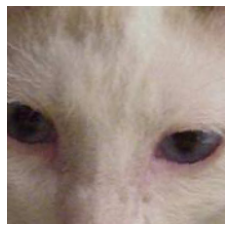

In [ ]:
import  cv2

from google.colab.patches import cv2_imshow
images, labels=next(iter(dataloader))
 
imshow(images[0])

In [ ]:
print(labels[1])

tensor(1)


In [ ]:
model = models.densenet121(pretrained=True)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Freeze parameters so we don't backprop through them
i=0
for param in model.parameters():
    param.requires_grad = False
    i= i+1
print(i)    

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier

364


In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
import time

In [ ]:
for device in ['cpu', 'cuda']:

    criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

    model.to(device)

    for ii, (inputs, labels) in enumerate(dataloader):

        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if ii==3:
            break
        
    print(f"Device = {device}; Time per batch: {(time.time() - start)/3:.3f} seconds")
#You can write device agnostic cod

Device = cpu; Time per batch: 0.616 seconds


RuntimeError: ignored

In [ ]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

In [ ]:
epochs = 6
steps = 0
running_loss = 0
print_every = 2
for epoch in range(epochs):
    for inputs, labels in dataloader:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_dataloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_dataloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_dataloader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/6.. Train loss: 0.703.. Test loss: 0.150.. Test accuracy: 0.963
Epoch 1/6.. Train loss: 0.315.. Test loss: 0.145.. Test accuracy: 0.929
Epoch 2/6.. Train loss: 0.405.. Test loss: 0.104.. Test accuracy: 0.968
Epoch 2/6.. Train loss: 0.222.. Test loss: 0.146.. Test accuracy: 0.958
Epoch 3/6.. Train loss: 0.314.. Test loss: 0.085.. Test accuracy: 0.963
Epoch 3/6.. Train loss: 0.197.. Test loss: 0.072.. Test accuracy: 0.979
Epoch 4/6.. Train loss: 0.147.. Test loss: 0.072.. Test accuracy: 0.963
Epoch 4/6.. Train loss: 0.131.. Test loss: 0.100.. Test accuracy: 0.958
Epoch 5/6.. Train loss: 0.148.. Test loss: 0.104.. Test accuracy: 0.958
Epoch 5/6.. Train loss: 0.278.. Test loss: 0.069.. Test accuracy: 0.973
Epoch 6/6.. Train loss: 0.219.. Test loss: 0.068.. Test accuracy: 0.979
Epoch 6/6.. Train loss: 0.101.. Test loss: 0.074.. Test accuracy: 0.963


In [ ]:
with torch.no_grad():
  inputs,labels = next(iter(test_dataloader))
  model.forward(inputs)
  batch_loss = criterion(logps, labels)

ValueError: ignored

In [ ]:
labels.shape

torch.Size([50])

In [ ]:
## CNN
# Import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

In [ ]:
# Data transform to convert data to a tensor and apply normalization

# augment train and validation dataset with RandomHorizontalFlip and RandomRotation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [ ]:
# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=train_transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=test_transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [ ]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [ ]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [ ]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display
images.shape # (number of examples: 20, number of channels: 3, pixel sizes: 32x32)

(20, 3, 32, 32)

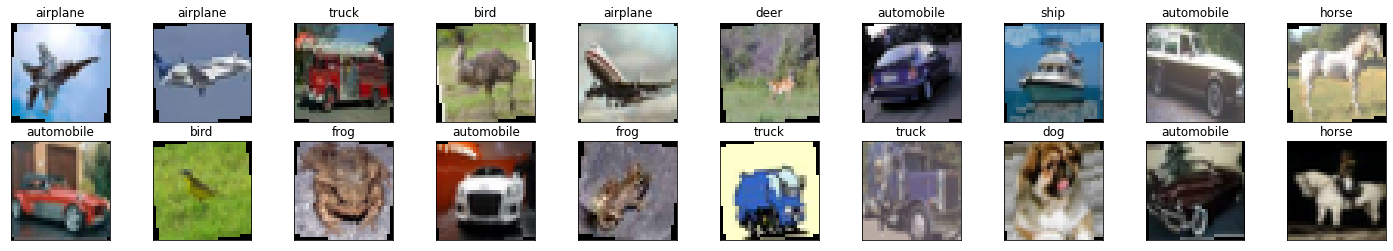

In [ ]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

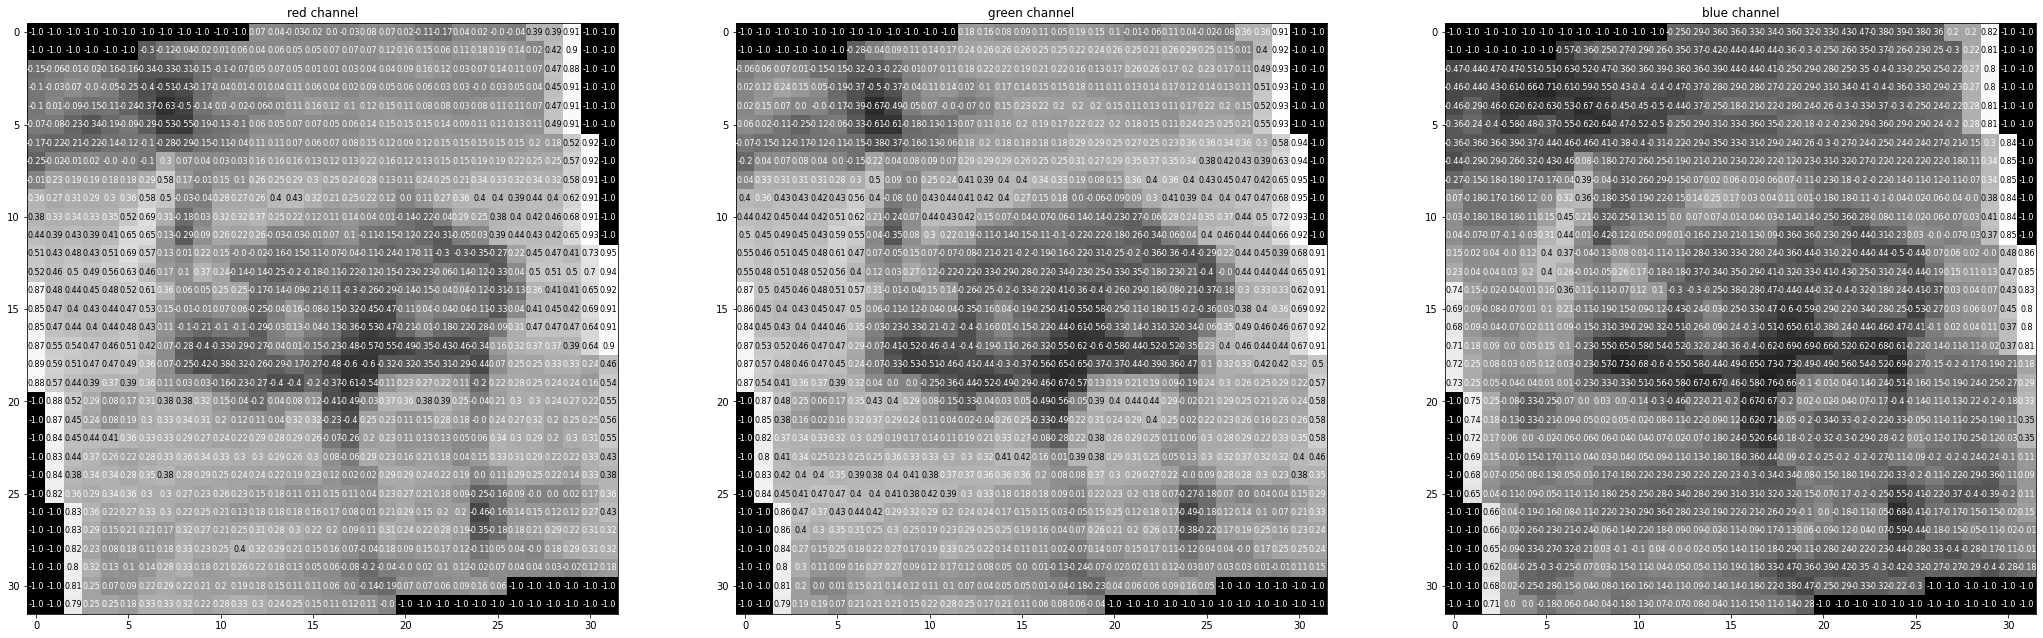

In [ ]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1=nn.Conv2d(3,16,3,padding=1)

    self.conv2 = nn.Conv2d(16,32,3,padding=1)

    self.conv3 = nn.Conv2d(32,64,3,padding=1)

    self.pool = nn.MaxPool2d(2,2)

    self.fc1 = nn.Linear(64*4*4,500)

    self.fc2 = nn.Linear(500,10)

    self.dropout = nn.Dropout(0.2)

  def forward(self,x)  :
    x= self.pool(F.relu(self.conv1(x)) )
    x = self.pool(F.relu(self.conv2(x)))
    x= self.pool(F.relu(self.conv3(x)))
    x = x.view(-1,64*4*4)
    x = F.relu(self.fc1(x))
    x= self.dropout(x)
    x = self.fc2(x)
    return x
    

In [ ]:
# create a complete CNN
model = Net()
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss


Epoch: 1 	Training Loss: -0.020569 	Validation Loss: -0.020337
Validation loss decreased (inf --> -0.020337).  Saving model ...
Epoch: 2 	Training Loss: -0.020536 	Validation Loss: -0.020407
Validation loss decreased (-0.020337 --> -0.020407).  Saving model ...
Epoch: 3 	Training Loss: -0.020602 	Validation Loss: -0.020385
Epoch: 4 	Training Loss: -0.020497 	Validation Loss: -0.020381
Epoch: 5 	Training Loss: -0.020526 	Validation Loss: -0.020401
Epoch: 6 	Training Loss: -0.020381 	Validation Loss: -0.020455
Validation loss decreased (-0.020407 --> -0.020455).  Saving model ...
Epoch: 7 	Training Loss: -0.020417 	Validation Loss: -0.020434
Epoch: 8 	Training Loss: -0.020554 	Validation Loss: -0.020418
Epoch: 9 	Training Loss: -0.020555 	Validation Loss: -0.020408
Epoch: 10 	Training Loss: -0.020565 	Validation Loss: -0.020420
Epoch: 11 	Training Loss: -0.020424 	Validation Loss: -0.020339
Epoch: 12 	Training Loss: -0.020569 	Validation Loss: -0.020322
Epoch: 13 	Training Loss: -0.02038